# What Words Should I Learn to Get Better at Solving the New York Times Crossword Puzzle?

### 1.1 Import Modules/Dataset

In [202]:
#importing modules and dataset
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

file = 'nytcrosswords.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
df = pd.read_csv(file, encoding = result['encoding'])
df.describe()

#Data set consists of three columns, 'Date', 'Word', and 'Clue'. 
# Comparing count of 'Word' and 'Clue' indicates that there are missing values.

,Date,Word,Clue
count,781573,781539,781573
unique,10207,63313,493935
top,5/16/1999,ERA,Jai ___
freq,181,634,122


### 1.2 Formatting/Examine Null Values

In [203]:
#Make sure Date column is a pd Date object
#Add separate column to indicate day of the week (Monday:0, ... Sunday:6)

df['Date'] = pd.to_datetime(df['Date'])
df['DayofWeek'] = df['Date'].dt.weekday

In [204]:
#Examine null values
nullmask = df.isnull().any(axis = 1)
nullrows = df[nullmask]
nullrows

,Date,Word,Clue,DayofWeek
24006,2020-12-24,NaN,Zero,3
43275,2020-04-17,NaN,Empty,4
67323,2019-06-07,NaN,Of no value,4
93805,2018-06-24,NaN,No longer in force,6
141809,2016-10-01,NaN,"{ }, in mathematics",5
157990,2016-03-03,NaN,Having no legal force,3
176711,2015-07-02,NaN,Invalid,3
189051,2015-01-22,NaN,Empty,3
195559,2014-10-29,NaN,Void,2
229912,2013-08-07,NaN,"Empty, as a math set",2


In [205]:
# The word "NULL" is being interpreted as NaN and needs to be replaced.
df['Word'] = df['Word'].fillna('NULL')

### 1.3 Investigate Other Possible Missing Values

xwordinfo.com provides thorough analysis of NYT crosswords, including mean values for numbers of clues per each day of the week. Plotting a histogram of number of puzzles by the numbers of clues suggests that some dates have an incomplete number of clues.

<Axes: title={'center': 'Histogram Reveals Missing Clues'}, xlabel='# of clues per puzzle', ylabel='# of puzzles'>

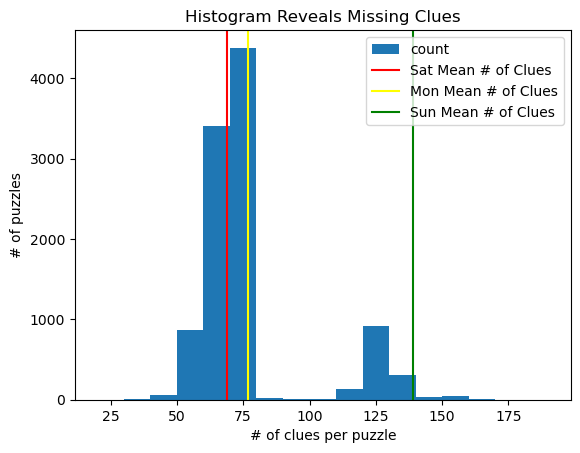

In [206]:
#Plot the number of times each date is in data set, plots # of clues for each day
datevals = df['Date'].value_counts()
ax1 = datevals.plot(kind = 'hist', bins = range(20, 200, 10))
ax1.set_title('Histogram Reveals Missing Clues')
ax1.set_ylabel('# of puzzles')
ax1.set_xlabel('# of clues per puzzle')
ax1.axvline(68.8, color = 'red', label = 'Sat Mean # of Clues')
ax1.axvline(76.9, color = 'yellow', label = 'Mon Mean # of Clues')
ax1.axvline(139.2, color = 'green', label = 'Sun Mean # of Clues')
ax1.legend()
ax1


In [155]:
#Examining a few of the puzzles with the smallest number of clues
#Determine whether or not there are missing clues.
datevals.tail(50)

#Compare these dates with published puzzles on 
# https://www.xwordinfo.com/Crossword?date=mm/dd/yyyy 
# (where mm = month, dd = date, yyyy = year)

#For example, the puzzle on 2008-08-22 lists 48 clues in this dataset, but on
#https://www.xwordinfo.com/Crossword?date=8/22/2008, this puzzle has 60 words.

#Does not seem to be a consistent issue with Across vs Down,
#as this puzzle has 27 clues Across and 33 clues Down. 

Date
2008-08-22    48
2014-07-05    48
2013-01-26    48
2007-12-22    48
1995-10-07    48
2008-11-08    48
2006-12-09    48
2007-01-20    48
2010-07-10    47
2012-07-27    47
2005-03-11    47
2006-01-21    47
2007-12-01    47
2017-11-25    47
2005-05-07    47
2017-08-19    47
2001-08-04    46
2001-10-20    46
2018-02-03    46
2005-09-24    46
2001-01-19    46
1994-06-18    46
2015-10-16    46
1995-02-11    46
1994-05-13    45
2015-07-18    45
2008-03-22    45
2010-03-20    45
2008-10-17    45
2004-06-05    45
2019-07-27    45
2005-10-08    45
2004-10-09    44
2010-01-02    44
2005-08-06    44
1996-06-15    43
2012-01-14    42
2005-01-01    42
2018-04-13    42
2012-06-01    42
1996-06-29    41
2013-09-21    41
2005-04-02    40
2004-11-13    38
1997-10-24    38
2001-12-15    37
2012-02-11    37
2008-01-04    33
2013-06-29    32
2005-01-21    28
Name: count, dtype: int64

#### What do we do about the missing clues?
For the purposes of this analysis, which concentrates on extracting words from the puzzles, we can include the words from the puzzles that have missing clues. An analysis more concerned with tracing characteristics of puzzles across the week would require a closer look at these missing days and removing them from the set. 

Analyzing puzzle difficulty over the week is common for this kind of dataset, with key findings being that from Monday through Saturday, mean word length goes up over the course of the week while the number of clues goes down. Sunday features more clues and shorter word lengths and is intended to be easier than the Saturday puzzle: more at https://www.nytimes.com/article/how-to-solve-a-crossword-puzzle.html

#### Brief example of Over-The-Week Analysis

Text(0.5, 0.98, 'Mean Length of Words Gets Longer Throughout The Week (Monday vs Saturday)')

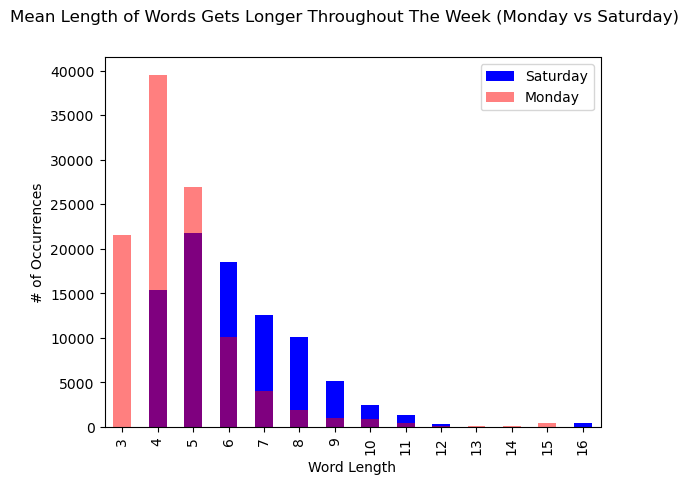

In [207]:
#adds new column with lengths of word
df['Length'] = df['Word'].apply(len)

#assume that puzzles with missing clues' days of the week are uniformly distributed
monmask = df['DayofWeek'] == 0
mon = df[monmask]

satmask = df['DayofWeek'] == 5
sat = df[satmask]

fig,ax = plt.subplots()
sat.value_counts('Length').sort_index().plot(kind = 'bar', ax = ax, color = 'blue', label = 'Saturday')
mon.value_counts('Length').sort_index().plot(kind = 'bar', ax = ax, alpha = .5, color = 'red', label = 'Monday')
plt.xlabel('Word Length')
plt.ylabel('# of Occurrences')
plt.legend()
fig.suptitle("Mean Length of Words Gets Longer Throughout The Week (Monday vs Saturday)")

### 1.4 Factor Engineering: Word Lengths, Vowel Ratio

In [208]:
#adds new column with ratio of vowels to length of word
def vowelratio(myword):
    """
    Vowel Ratio Function:
    Input: word as string
    Returns: float representing proportion of vowels to the length of the total word
    """
    
    vowelcount = myword.count('A') + myword.count('E') + myword.count('I')\
                + myword.count('O') + myword.count('U') + myword.count('Y')
    
    return round((vowelcount/len(myword)), 3)

df['VowelRatio'] = df['Word'].apply(vowelratio)

In [209]:
#Reorder Columns
cols = df.columns.tolist()
cols = ['Date', 'DayofWeek', 'Clue', 'Word', 'Length', 'VowelRatio']
df = df[cols]
df

,Date,DayofWeek,Clue,Word,Length,VowelRatio
0,2021-10-31,6,"Action done while saying ""Good dog""",PAT,3,0.333
1,2021-10-31,6,Mischief-makers,RASCALS,7,0.286
2,2021-10-31,6,It might click for a writer,PEN,3,0.333
3,2021-10-31,6,Fall mo.,SEP,3,0.333
4,2021-10-31,6,Kind to Mother Nature,ECO,3,0.667
...,...,...,...,...,...,...
781568,1993-11-21,6,Actor Pendleton,NAT,3,0.333
781569,1993-11-21,6,Bit,SHRED,5,0.200
781570,1993-11-21,6,Teachers' org.,NEA,3,0.667
781571,1993-11-21,6,Petition,BEG,3,0.333


### 2.1 Exploratory Analysis: Most-Common Clues

Examine the most frequent clues will give some insight into how puzzles are organized and what words to study.

<Axes: title={'center': 'Most Common Clues'}, xlabel='# of occurrences', ylabel='Clues'>

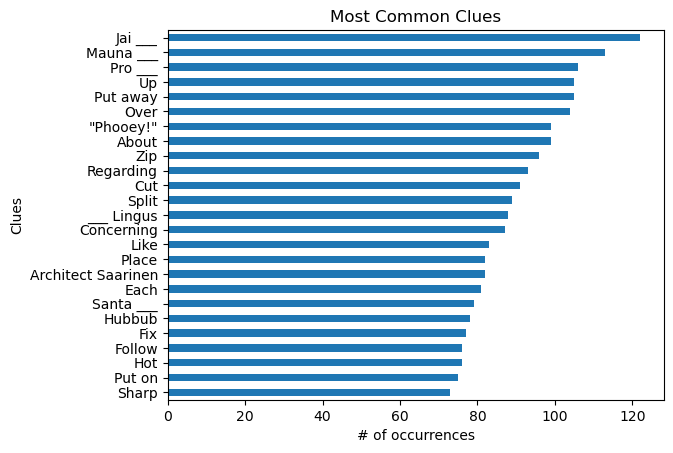

In [210]:
#Find most common clues: call value counts on clues, then take and plot the top 25
cluecounts = df['Clue'].value_counts()
top25rev = cluecounts[:25]
top25 = top25rev[::-1]

ax2 = top25.plot(kind = 'barh')
ax2.set_ylabel('Clues')
ax2.set_xlabel('# of occurrences')
ax2.set_title('Most Common Clues')
ax2

#### Specific vs. General:
Clues that feature the most in these puzzles do so for two related reasons. Some words that feature in the puzzle may only have one or two plausible denotations in the English language, and only a few clues to cue the average solver.

For instance, "JAI _" is the most frequently used clue, because of the frequency of the word, "ALAI" in puzzles and few other uses in the English language. Merriam-Webster.com indicates that "ALAI" is also a mountain range in Kyrgyzstan: https://www.merriam-webster.com/dictionary/Alai


In [351]:
#confirms prominence of "JAI _" clue for indicating ALAI.
alaidf = df.loc[df['Word'] == "ALAI"]
alaidf #comment out this line or the next
# alaidf.shape

,Date,DayofWeek,Clue,Word,Length,VowelRatio
15777,2021-04-09,4,Second word of a game name that rhymes with th...,ALAI,4,0.75
15943,2021-04-07,2,Jai ___,ALAI,4,0.75
19911,2021-02-15,0,Jai ___,ALAI,4,0.75
27238,2020-11-12,3,Jai ___,ALAI,4,0.75
40269,2020-05-26,1,Jai ___,ALAI,4,0.75
...,...,...,...,...,...,...
768400,1994-05-09,0,Jai ___,ALAI,4,0.75
769181,1994-04-29,4,Kyrgyz range,ALAI,4,0.75
770239,1994-04-15,4,Jai ___,ALAI,4,0.75
772015,1994-03-22,1,Jai ___,ALAI,4,0.75


In [212]:
#compare to a similarly obscure word that features 109 more times in the puzzles, but with many more clues
epeedf = df.loc[df['Word'] == "EPEE"]
epeedf #comment out this line or the next
epeedf.shape

(279, 6)

#### Specific vs. General continued:
Some clues feature prominently not because they only point to one word, but instead point to ___lots___ of possible words. For example, "Cut", the 11th most common clue, points to 35 different words. This relates to the various meanings of the word, including cut functioning both in the present and past tense.

In [352]:
cutdf = df.loc[df['Clue'] == "Cut"]
cutdf
#Notice how 'Cut' cues words with different connotations, with both mild and violent terms
#and words that are associated with cutting certain things (wood, grass, hair, # of pages in a book)

['AXED',
 'AXED',
 'SHEAR',
 'SKIP',
 'HEWN',
 'LOP',
 'SAWN',
 'SCISSOR',
 'SAWN',
 'MOW',
 'OMIT',
 'HEWN',
 'AXE',
 'SEVER',
 'SAWED',
 'OMIT',
 'SEVER',
 'LOP',
 'SHEAR',
 'SLIT',
 'DECREASE',
 'ABRIDGE',
 'SEVER',
 'DELE',
 'HEWN',
 'DELETE',
 'SHARE',
 'KNIFE',
 'HEWED',
 'HEW',
 'SAWN',
 'MOWED',
 'SHEAR',
 'SLIT',
 'LOP',
 'SEVER',
 'SHEAR',
 'LOP',
 'MOWN',
 'MOWN',
 'LESION',
 'SAWN',
 'SHEAR',
 'SHEAR',
 'SLIT',
 'HEWED',
 'SHEAR',
 'LESSENED',
 'SLIT',
 'LOP',
 'SAWN',
 'HEWN',
 'ETCH',
 'SEVER',
 'AXED',
 'MOW',
 'SHEARED',
 'HEWN',
 'SHEAR',
 'SHORTENED',
 'DELETE',
 'SLASHED',
 'SEVER',
 'OMIT',
 'MOWN',
 'MOW',
 'HEWED',
 'SHEARED',
 'ABRIDGE',
 'SAWN',
 'LOPPED',
 'SHARE',
 'DECREASE',
 'AXE',
 'SAWN',
 'GASH',
 'SAW',
 'LOP',
 'ABRIDGE',
 'MOWN',
 'DECREASE',
 'SLIT',
 'GASHED',
 'SHARE',
 'SLIT',
 'SNIP',
 'LOP',
 'SHARE',
 'SNIP',
 'SNIP',
 'SLICED']

In [214]:
#Confirm this analysis with a second general vs specific visualization,
#indicate how many words each of the top 25 clues points to.

top25 = df['Clue'].isin(cluecounts[:25].index)
dftop25 = df[top25]
# dftop25['Clue'].unique()
dftop25.groupby('Clue')['Word'].nunique() #series
cluecounts[:25] #series

Clue
Jai ___               122
Mauna ___             113
Pro ___               106
Up                    105
Put away              105
Over                  104
"Phooey!"              99
About                  99
Zip                    96
Regarding              93
Cut                    91
Split                  89
___ Lingus             88
Concerning             87
Like                   83
Place                  82
Architect Saarinen     82
Each                   81
Santa ___              79
Hubbub                 78
Fix                    77
Follow                 76
Hot                    76
Put on                 75
Sharp                  73
Name: count, dtype: int64

In [215]:
#Subset of dataset, all uses of top 25 clues.
top25 = df['Clue'].isin(cluecounts[:25].index)
dftop25 = df[top25]
dftop25

,Date,DayofWeek,Clue,Word,Length,VowelRatio
170,2021-10-30,5,Hot,ONAROLL,7,0.429
1251,2021-10-16,5,Zip,NONE,4,0.500
1337,2021-10-15,4,Concerning,INRE,4,0.500
1771,2021-10-09,5,Place,ORIENT,6,0.500
1918,2021-10-07,3,Mauna ___,KEA,3,0.667
...,...,...,...,...,...,...
780015,1993-12-10,4,Over,ATOP,4,0.500
780082,1993-12-09,3,Each,APIECE,6,0.667
780433,1993-12-05,6,Over,ENDED,5,0.400
780437,1993-12-05,6,Regarding,ASTO,4,0.500


In [216]:
#finds number of words associated with each clue
dftop25.groupby('Clue')['Word'].nunique() #series

Clue
"Phooey!"             15
About                  9
Architect Saarinen     2
Concerning             6
Cut                   35
Each                   5
Fix                   21
Follow                13
Hot                   21
Hubbub                13
Jai ___                1
Like                  12
Mauna ___              2
Over                  14
Place                 14
Pro ___                5
Put away              18
Put on                19
Regarding              7
Santa ___              8
Sharp                 20
Split                 38
Up                    18
Zip                   19
___ Lingus             1
Name: Word, dtype: int64

<Axes: title={'center': 'Most Common Clues: # of Words They Indicate'}, xlabel='# of unique answers', ylabel='Clues'>

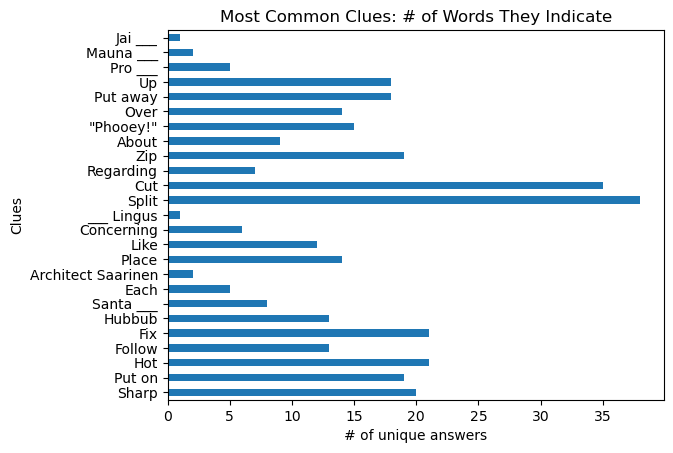

In [168]:
#Plot top 25 clues again, but this time by number of words they indicate.

myuniquerev = dftop25.groupby('Clue')['Word'].nunique()[cluecounts[:25].index]
myunique = myuniquerev[::-1]
myunique
ax3 = myunique.plot(kind = 'barh')
ax3.set_ylabel('Clues')
ax3.set_xlabel('# of unique answers')
ax3.set_title('Most Common Clues: # of Words They Indicate')
ax3

#### Most Common Clues Concluded:
People wanting to improve at the crossword should study these clues and divide their efforts depending on the number of words they indicate. For specific clues that point to very few words, simple memorization: "ALAI" for "Jai \_" or "AER" for "\_ Lingus" will be enough. For general clues, study the different connotations of words that that clue can point to (like all the uses of "Cut"!) and the various words that belong.

### 2.2 Exploratory Analysis: Most-Common Words- Preliminary Work
Solvers can get better at solving puzzles by making sure they know the most commonly-featured words.

In [217]:
#Look at word lengths first
lengthcounts = df['Length'].value_counts()
lengthcounts

Length
4     243618
5     183410
3     159682
6      94341
7      52562
8      24006
9      10600
10      6140
15      2979
11      2462
12       713
13       656
14       328
16        37
17        21
18         6
2          3
21         3
19         2
20         2
22         1
1          1
Name: count, dtype: int64

#### There is a sharp dropoff of words with lengths 1, 2, and then 16 through 22.
Let's examine words of these lengths to make sure we're not missing anything

In [218]:
#find all words in dataframe with lengths 1 and 2
shortlengths = [1, 2]
shortmask = df['Length'].isin(shortlengths)
shorts = df[outliermask]
shorts

,Date,DayofWeek,Clue,Word,Length,VowelRatio
80172,2018-12-20,3,"With 38-Across, what a two-letter answer is in...",NO,2,0.5
80174,2018-12-20,3,See 35-Across,NO,2,0.5
223435,2013-10-31,3,"64-Across, in 23-Down",,1,0.0
485629,2004-06-12,5,It's just past three,PI,2,0.5


#### NO and PI are the only two-letter words featured in the NYT Crossword
On a closer look at the seemingly blank word, the clue translates to "DRACULA, in MIRRORS" and
is meant to be left blank! https://www.xwordinfo.com/Crossword?date=10/31/2013.

In [219]:
#find all long words in dataframe
pd.set_option('display.max_rows', 75)
longlengths = range(16, 23)
longmask = df['Length'].isin(longlengths)
longs = df[longmask]
longs.sort_values(by = 'Length', ascending = False)
longs

,Date,DayofWeek,Clue,Word,Length,VowelRatio
594,2021-10-24,6,Blackjack dealer?,DESIGNATEDHITTER,16,0.375
15054,2021-04-18,6,Popular action film franchise ... or what tryi...,MISSIONIMPOSSIBLE,17,0.412
24814,2020-12-13,6,Indy film? (1981),RAIDERSOFTHELOSTARK,19,0.368
42830,2020-04-22,2,Location in the New World until 1776,THIRTEENCOLONIES,16,0.438
46316,2020-03-08,6,2002 Winter Olympics locale,SALTLAKECITYUTAH,16,0.438
48156,2020-02-13,3,Reference that arranges words by concept rathe...,REVERSEDICTIONARY,17,0.471
59570,2019-09-16,0,"""To be totally clear"" ... or why to bring in a...",JUSTFORTHERECORD,16,0.312
63994,2019-07-21,6,Announcement of July 1969,THEEAGLEHASLANDED,17,0.412
72252,2019-04-03,2,"*Roald Amundsen, 1906",NORTHWESTPASSAGE,16,0.312
76762,2019-02-03,6,"Seeming opposite of ""Ignorance is bliss""",THETRUTHWILLSETYOUFREE,22,0.409


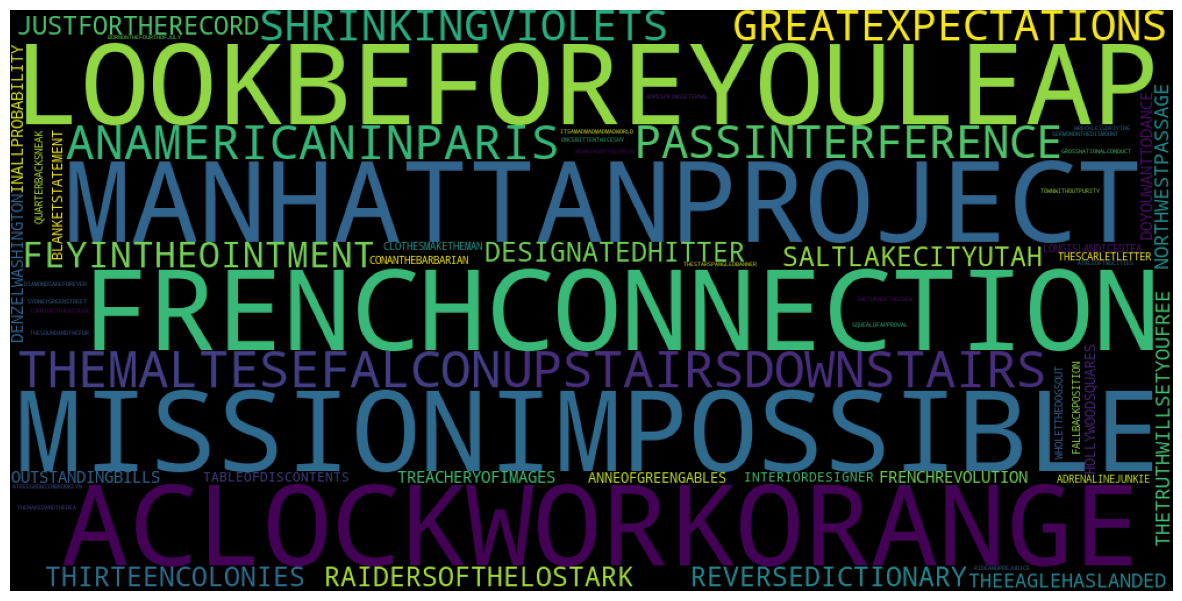

In [220]:
#Make a wordcloud from 
x = longs['Word'].tolist()
unique_string = (' ').join(x)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### A quick look at this wordcloud indicates that the longest words featured in the crosswords are usually not single words, but more often proper nouns or idioms and not as pertinent for study.

### 2.3 Exploratory Analysis: Top 25 Words

Text(0.5, 1.0, 'Most Common Words in NYT Crossword Puzzles 1993-2021')

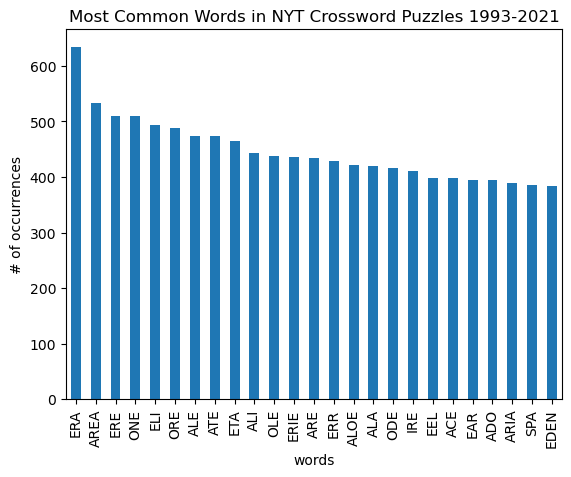

In [221]:
#Find Top 25 most commonly featured words in NYT Crossword Puzzle
wordcounts = df['Word'].value_counts()
ax4 = wordcounts[:25].plot(kind = 'bar')
ax4.set_ylabel('# of occurrences')
ax4.set_xlabel('words')
ax4.set_title('Most Common Words in NYT Crossword Puzzles 1993-2021')

In [222]:
#Subset of dataset, all uses of top 25 clues. Use this to compare vs entire dataset.
top25 = wordcounts[:25]
top25wordsmask = df['Word'].isin(top25.index)
dftop25words = df[top25wordsmask]

In [223]:
def findavgvowelratio(mydf):
    """
    Find Average Vowel Ratio Function:
    Input: dataframe
    Returns: Float representing mean proportion of vowels to the length of the total word
    (requires numpy imported as np)
    """
    mylist = []
    for word in mydf['Word'].unique():
        mylist.append(vowelratio(word))
    return np.mean(mylist)
print(findavgvowelratio(dftop25words))
print(findavgvowelratio(df))

#compared to the entire wordlist, the top 25 words have a higher vowel-ratio: .65 vs .41

0.64688
0.4050060808036138


### 2.4 Exploratory Analysis: Top NYT Words vs Top Words in Common Usage
While the list of the top 25 words is a good beginning of a study list, there are several words here that a beginner to crosswords may already know. "ERA", "ONE", "ARE", "EAR", and others are perhaps too common, and including these in a study list is too simple, even for a beginner. Cross out a couple of these words at the start, and this list starts looking thin.

So, I take a different approach. Take the list of the most-commonly used words again without any filtering. Compare that list against another list, one from https://www.wordfrequency.info/samples.asp, a list of 5,050 of the most common and currently-used words in the English language. By eliminating these words from the puzzle list, we get a closer approximation of an effective study guide: Words that are common in the puzzles, but not as common in English usage.

##### Avoid Lemmatization
Lemmatization is a commonly-used processing technique for text to reduce forms of words to a more basic word form before analysis. For instance, all tenses of a verb are reverted back to a basic infinitive ('AM', 'ARE', 'WAS', 'WERE' -> 'BE'), along with plurals, and even words associated by more-general meaning. More here: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.htmlpd.set_option. This is a way of ensuring that text analysis is standardized across studies and disciplines. This processing, while valuable in many data science contexts, is not important here. Different forms of words coexist in the NYT list, along with acronyms or other small phrases that fall outside of the scope of the lemmatization process, at least with the way that I am organizing this process. Crossword puzzles rely on subtle differences of forms of words, and I don't want my process to rule any of this out without my knowledge.

What this means for this analysis is that the word frequency list I use comes in a "de-lemmatized" form, ("IS", "WAS", "BE", and "ARE" are all separate entries in the top 25. With words like both "ENO" and "ENOS" featuring in the NYT list, I think it makes sense to avoid any pre-processing of the text that I don't understand fully.

##### About the new dataset
From this page: https://www.wordfrequency.info/samples.asp , I downloaded page 4, the de-lemmatized version, and then used page 4 of the file. I deleted a lot of the auxiliary data about the words' sources, which is explained well on their website, and exported that cleaned version in a .csv called "top5050.csv".

In [224]:
#import top5050 csv, add VowelRatio column

top5050 = pd.read_csv('top5050words.csv')
top5050['Word'] = top5050['Word'].str.upper()
top5050['VowelRatio'] = top5050['Word'].apply(vowelratio)
top5050

,Word,VowelRatio
0,THE,0.333
1,TO,0.500
2,AND,0.333
3,OF,0.500
4,A,1.000
...,...,...
5045,UH-HUH,0.333
5046,AWAKE,0.600
5047,OPPONENT,0.375
5048,TRAUMA,0.500


In [348]:
#Two Samples of top5050, indicating the general kinds of words featured.
top5050.sample(10, random_state = 0)

,Word,VowelRatio
1116,STANDARD,0.250
502,ESPECIALLY,0.500
4517,GLORY,0.400
487,WORD,0.250
4553,CUBA,0.500
575,VOICE,0.600
4742,FORCING,0.286
562,BUILDING,0.375
298,ASKED,0.400
4889,BOW,0.333


In [349]:
top5050.sample(10, random_state = 1)

,Word,VowelRatio
3960,PURSUE,0.500
4384,UNDERLYING,0.400
1796,VOICE-OVER,0.500
2785,INCIDENT,0.375
1675,DEMAND,0.333
1528,MEASURE,0.571
4621,DRAG,0.250
834,CHANGED,0.286
3737,VITAL,0.400
3339,CURIOUS,0.571


In [225]:
#Take value counts of NYT words, add VowelRatio column
wcdf = pd.DataFrame(wordcounts).reset_index()
wcdf['VowelRatio'] = wcdf['Word'].apply(vowelratio)
wcdf

,Word,count,VowelRatio
0,ERA,634,0.667
1,AREA,534,0.750
2,ERE,510,0.667
3,ONE,510,0.667
4,ELI,493,0.667
...,...,...,...
63309,COOKIESANDCREAM,1,0.467
63310,BIGBANDS,1,0.250
63311,PATPAULSEN,1,0.400
63312,HIKEUP,1,0.500


### 2.5: Assemble Study List

In [298]:
#Make study list
studylist = wcdf.loc[(~wcdf["Word"].isin(top5050['Word']))]
studylist

,Word,count,VowelRatio
2,ERE,510,0.667
4,ELI,493,0.667
5,ORE,489,0.667
6,ALE,474,0.667
8,ETA,465,0.667
...,...,...,...
63309,COOKIESANDCREAM,1,0.467
63310,BIGBANDS,1,0.250
63311,PATPAULSEN,1,0.400
63312,HIKEUP,1,0.500


This list is raw material for a final study guide, but it is too long and features words that aren't common enough in the crossword for targeted study.

In [299]:
#looking at the counts in a birdseye view
studycounts = studylist['count']
with pd.option_context('display.max_rows', None,): print(studycounts)

2        510
4        493
5        489
6        474
8        465
9        444
10       438
11       436
13       429
14       421
15       420
16       416
17       411
18       399
19       398
21       394
22       389
23       386
24       384
25       383
27       378
28       375
29       370
30       369
32       357
33       351
35       348
37       344
39       333
40       327
43       320
47       315
48       313
50       309
52       308
53       308
57       301
58       299
60       293
62       291
63       290
65       286
68       283
70       282
71       282
72       281
74       279
75       279
76       277
79       275
80       274
81       273
82       273
83       272
86       268
87       268
88       267
91       266
92       265
94       264
96       263
97       263
98       263
99       261
100      259
101      257
103      256
104      256
105      256
106      255
108      255
109      255
110      254
113      252
115      251
116      248
117      248

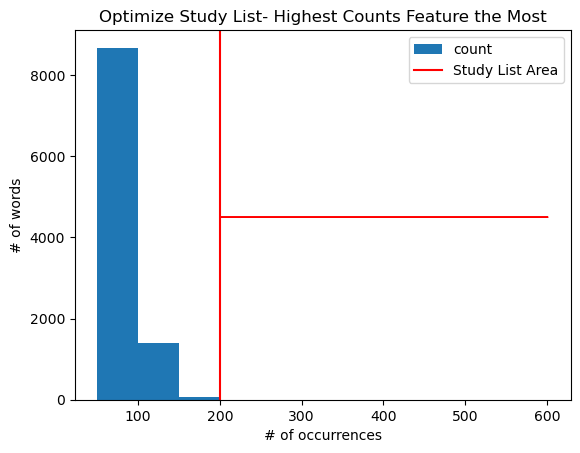

In [300]:
studyvalcounts = studylist['count'].value_counts()
ax5 = datevals.plot(kind = 'hist', bins = range(50, 650, 50))
ax5.set_title('Optimize Study List- Highest Counts Feature the Most')
ax5.set_ylabel('# of words')
ax5.set_xlabel('# of occurrences')
ax5.axvline(200, color = 'red', label = 'Study List Area')
ax5.arrow(200, 4500, 400, 0, color = 'red', head_width = 1)
plt.legend()

This histogram reveals that most words on the list only feature a few times. After 200 occurrences, the number of words sharply decreases, making the histogram look empty. The study list should feature the words in the bins that currently look empty. We need to trim the data and visualize it again.

<Axes: title={'center': 'Trimmed Study List- 200 or More Occurrences'}, xlabel='# of occurrences', ylabel='# of words'>

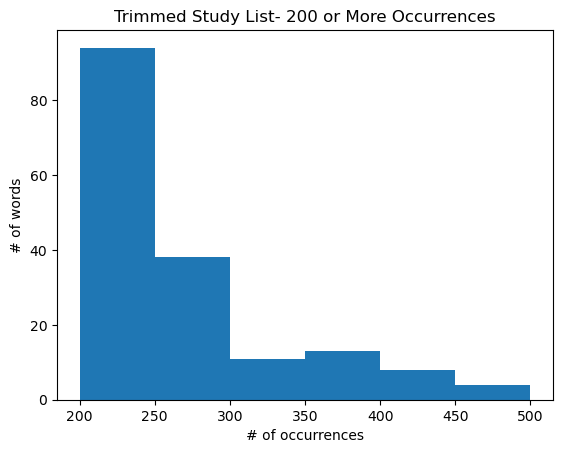

In [353]:
trimmedstudycounts = studycounts[studycounts > 200]
trimmedstudycounts
ax6 = trimmedstudycounts.plot(kind = 'hist', bins = range(200, 550, 50))
ax6.set_title('Trimmed Study List- 200 or More Occurrences')
ax6.set_ylabel('# of words')
ax6.set_xlabel('# of occurrences')
ax6

This second histogram of words with more than 200 appearances in the puzzles represents the empty space in the previous histogram. A dropoff continues with number of occurrences: only one word features more than 500 times! The words featured here will make an optimized study list: Lots of occurrences in the puzzle, but less common in frequent English usage.

In [312]:
trimmedstudylist = studylist[studylist['count'] >= 200]
trimmedstudylist = trimmedstudylist.reset_index()
trimmedstudylist

,index,Word,count,VowelRatio
0,2,ERE,510,0.667
1,4,ELI,493,0.667
2,5,ORE,489,0.667
3,6,ALE,474,0.667
4,8,ETA,465,0.667
...,...,...,...,...
168,245,RENE,201,0.500
169,247,AAA,200,1.000
170,248,AWE,200,0.667
171,249,EER,200,0.667


trimmedstudylist is a dataframe that contains 173 of the top words featured in the NYT crossword puzzle that fall outside of the top 5050 standard words currently used in the English language. The column index indicates the word's original index in the list of most common words in the NYT Crossword overall. This dataframe is a great jumping off point for someone wishing to study the NYT Crossword puzzle and improve at it.

In [313]:
trimmedstudylist.sample(10, random_state=0)

,index,Word,count,VowelRatio
54,86,OSLO,268,0.500
146,216,URN,210,0.333
63,99,RNA,261,0.333
55,87,ETAL,268,0.500
125,191,ADA,217,0.667
100,150,OTTO,233,0.500
7,11,ERIE,436,0.750
155,227,EDS,207,0.333
104,159,EERIE,230,0.800
89,136,ASHE,239,0.500


__Consider this sample of 10 words from trimmedstudylist.__
Anyone working on the NYT crossword may know some of these words and may not. Some words have a variety of meanings and clues, while others only a few. Even within this sample, there are proper nouns: ("OSLO", "OTTO", "ERIE", "ASHE"), other regular English words: ("URN", "EERIE"), and abbreviations and non-English phrases: ("RNA", "ETAL", "EDS"). A word like "ADA" functions in many contexts, both as characters and titles of various books, an abbreviation for both the Americans with Disabilities Act and the American Dental Association, and the names of people like computing pioneer Ada Lovelace or 2009 Nobel Prize winner, Ada Yonath. Even words like "ASHE" have another use, "AS HE", which increases the number of clues to cue the word.

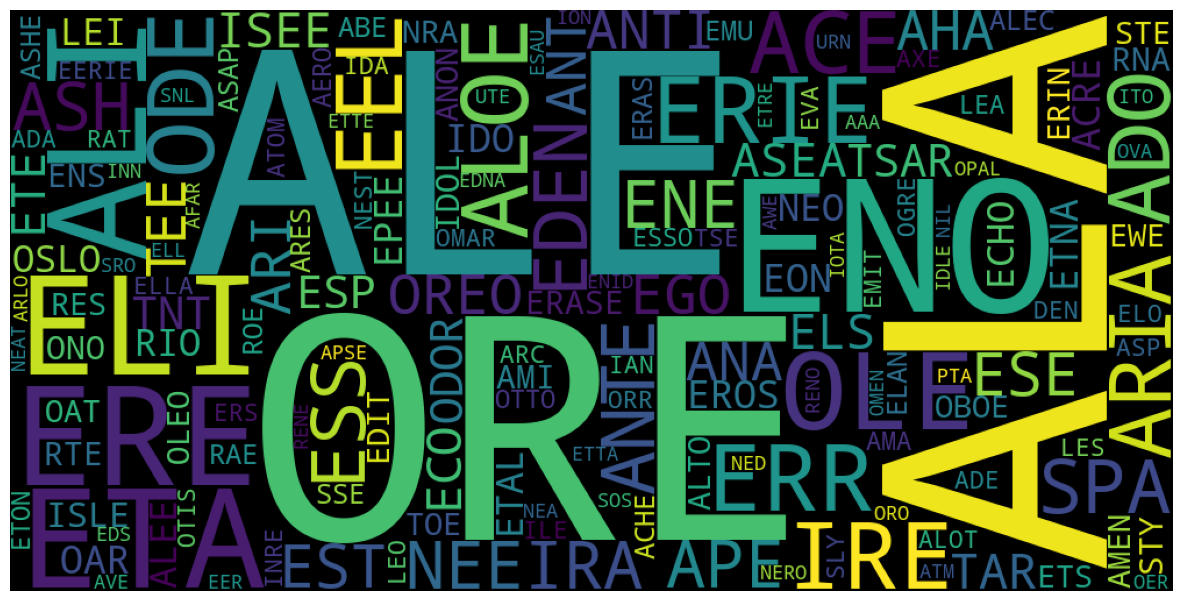

In [343]:
y = trimmedstudylist['Word'].tolist()
unique_string = (' ').join(y)
wordcloud1 = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [350]:
#Breakdown of letters in the wordcloud
def lettercounts(mystring):
    """
    Find Counts of Each Letter in the Alphabet:
    Input: string mystring
    Returns: List of strings with counts of each letter
    """
    alphastring = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    return ['{}={}'.format(x, myString.count(x)) for x in alphastring]
lettercounts(unique_string)

['A=89',
 'B=2',
 'C=7',
 'D=16',
 'E=132',
 'F=1',
 'G=2',
 'H=5',
 'I=31',
 'J=0',
 'K=0',
 'L=36',
 'M=9',
 'N=42',
 'O=62',
 'P=9',
 'Q=0',
 'R=49',
 'S=46',
 'T=42',
 'U=4',
 'V=3',
 'W=2',
 'X=1',
 'Y=2',
 'Z=0']

The Word Cloud here helps indicate what we suspect: The words to concentrate on learning to improve your crossword game are words mostly 3 and 4 lettesr long. The letter content of these words mirrors the distribution you see in other word games like Scrabble: lots of vowels (particularly A, E, I, and O)and the most-commonly used consonants like L, R, S, and T.

The average solver could take this list and study it on their own, but they could keep the dataframe here in python and examine individual words on the list and the clues that point to those words, gaining understanding on the variety of contexts that crosswords cue certain words.

In [344]:
def findclues(word, num):
    """
    Finds all unique clues associated with provided word:
    Input: word as string, int as number of unique clues to return
    Returns: single-column dataframe of all unique clues that point to given word
    (requires pandas imported as pd)
    """
    word = str(word).upper()
    mydf = df.loc[df['Word'] == word]
    xgroup = mydf.groupby('Clue').nunique()
    return pd.DataFrame(xgroup.index.values).head(num)

,0
0,"""Bleak House"" girl"
1,"""Cold Mountain"" heroine"
2,1969 Nabokov novel
3,"1969 literary heroine who says ""I like the wor..."
4,"1969 novel subtitled ""Ardor: A Family Chronicle"""


In [346]:
#Two Examples, ASHE
findclues('ASHE', 10)

,0
0,"""A Hard Road to Glory"" athlete-author"
1,"""A Hard Road to Glory"" author"
2,"""A Hard Road to Glory"" writer"
3,"""As Long ___ Needs Me"" (""Oliver!"" song)"
4,"""But, ___ was ambitious, I slew him"": Brutus"
5,"""Days of Grace"" author"
6,"""Days of Grace"" memoirist Arthur"
7,"""Hard Road to Glory"" author"
8,"""Hard Road to Glory"" writer"
9,"""Off the Court"" author"


In [347]:
# ADA
findclues('ADA', 10)

,0
0,"""Bleak House"" girl"
1,"""Cold Mountain"" heroine"
2,1969 Nabokov novel
3,"1969 literary heroine who says ""I like the wor..."
4,"1969 novel subtitled ""Ardor: A Family Chronicle"""
5,"1990s antidiscrimination law, for short"
6,Abbr. on a toothpaste box
7,Abbr. on a tube
8,Abbr. on toothpaste tubes
9,Boise's county


In [ ]:
#Option to Export to CSV to study.
# trimmedstudylist.to_csv('trimmedstudylist.csv', index=False)

### 3: Conclusions and Next Steps
For someone who wants to take solving the NYT Crossword Puzzle seriously, the analysis above points them in a couple directions. There are robust resources already online for people wanting to improve, even from the New York Times itself, but my study points you in a few less-studied directions.

One is to get a handle on the most-common clues and the way they indicate words. Some clues are quite specific, only pointing to one or two words, and learning that clue and its words will greatly improve your playing. Other clues are quite general, and understanding all the possible words that a clue can indicate, including less common connotations, are a way to improve.

Concentrating on the most commonly featured words is another powerful way to study and improve. By taking a list of the most common NYT words and crossing out any that feature in the most common English usage, we get a list of words that both feature prominently in the puzzle, but are likely not all known to the average solver. This list serves as a vital jumping off point for those who want to improve their game. These words are shorter, between 3 and 5 letters long, and feature lots of vowels.

Puzzlers should refer to the lists and processes outlined here, but also keep their eyes peeled in their lives for words and abbreviations like these. Actively engaging with these words outside of the context of puzzle solving is one of the great ways to reinforce your learning.

#### Next Steps: 
##### Closer Look at Vowel Ratios
Next steps in this work would include several possibilities. A closer look at the vowel ratio and how it changes as we alter the list of words would be an interesting process. While the top 25 words are heavily vowelly, trimming that list into the study list drops the ratio by a lot, while the list as a whole is somewhere in the middle.

In [308]:
print(findavgvowelratio(dftop25words))
print(findavgvowelratio(trimmedstudylist))
print(findavgvowelratio(df))

0.64688
0.4050060808036138
0.5394508670520232


##### Trace Words on the Study List Over Time
A way to reinforce the study list's validity would be to trace words that feature in the list over time. A word may have featured prominently, say, in the 90's, but not since. While it could still be present on the list, maybe it has gone out of fashion with new puzzle creators, and so less worth a puzzler's time.

##### Filter Missing Clues, Understand How Clues Change Throughout the Week
Another possible next step would be to filter out the puzzles with missing clues, giving us more opportunities to visualize and understand how puzzles change over time. With these changes, we could ask subtler questions about the words and their clues. For instance, do the clues for "ADA" change over the course of the week? This process might also include lemmatization of the clues themselves, seeing if we can more clearly see how many meanings each word refers to. For instance, "ADA" has separate clues now for "Orthodontist's Association" and "Orthodontists' Association" (watch for the plural!). Some text processing could help narrow down the kinds of clues associated with each word and help the solver understand more about the puzzles.

# Thank You!
You can reach me at jdsferra@gmail.com or at github.com/jdsferra.